### We are just going to assume for now that the only external force is a pressure

So the equations will be:

\[\frac{d \sigma}{ds} + t_n \kappa = 0\]
\[\frac{d \t_n}{ds} - \sigma \kappa = p\],

where p is defined as force per unit length

k, no latex, whatever   


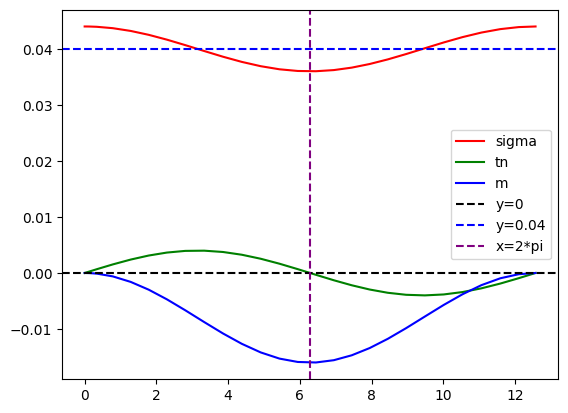

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import desolver as de
import desolver.backend as D

def rhs(t, state, kappa, R, p):
    sigma, tn, m = state
    dsigma = -kappa * tn
    angle = t / R
    dt = kappa * sigma - p #* np.sin(angle)
    dm = -tn 

    return D.array([dsigma, dt, dm])

R = 2
kappa = 1 / R
p = 0.02
params = {'kappa': kappa, 'R': R, 'p': p}

initial_state = D.array([1.1*p * R, 0, 0])

a = de.OdeSystem(rhs, y0=initial_state, dense_output=False, t=(0, 2*np.pi * R), dt=0.001, constants=params)
a.method = 'RK1412'
a.integrate()

y = a.y
t = a.t

plt.plot(t, y[:,0], label='sigma', color='red')
plt.plot(t, y[:,1], label='tn', color='green')
plt.plot(t, y[:,2], label='m', color='blue')
plt.axhline(y=0, color='black', linestyle='--', label='y=0')
plt.axhline(y=0.04, color='blue', linestyle='--', label='y=0.04')
plt.axvline(x=2 * np.pi, color='purple', linestyle='--', label='x=2*pi')
plt.legend()
plt.show()

In [29]:
t_min_y0 = t[np.argmin(y[:, 0])]
t_min_y1 = t[np.argmin(y[:, 1])]

print(t_min_y0, t_min_y1)

6.515181677433477 9.489471326087946


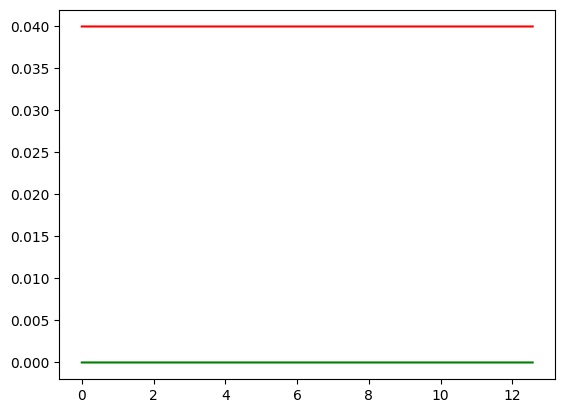

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import desolver as de
import desolver.backend as D

def rhs(t, state, kappa, R, p):
    sigma, eta = state
    dsigma = eta
    deta = -kappa ** 2 * sigma + kappa * p
    return D.array([dsigma, deta])

R = 2
kappa = 1 / R
p = 0.02
params = {'kappa': kappa, 'R': R, 'p': p}

initial_state = D.array([p * R, 0])

a = de.OdeSystem(rhs, y0=initial_state, dense_output=False, t=(0, 2*np.pi * R), dt=0.01, constants=params)
a.method = 'Euler'
a.integrate()

y = a.y
t = a.t

plt.plot(t, y[:,0], label='sigma', color='red')
plt.plot(t, y[:,1], label='dsigma/ds', color='green')


In [6]:
y.shape

(12568, 3)

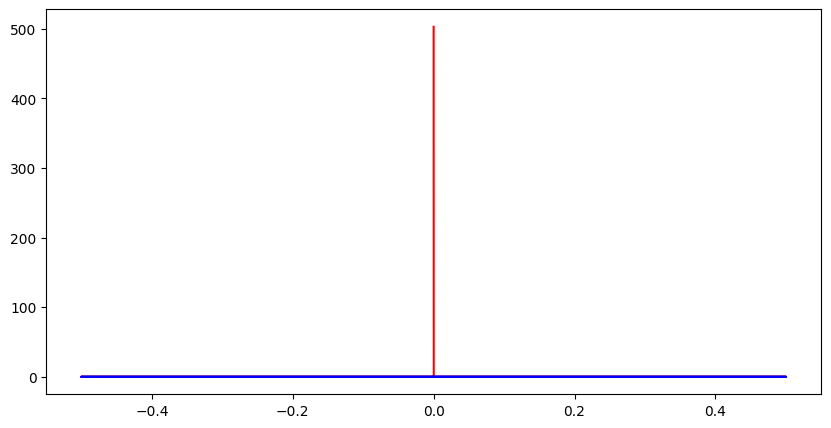

In [7]:
sigmas = y[:,0]
ms = y[:,2]

sigmas_ft = np.fft.fft(sigmas)
ms_ft = np.fft.fft(ms)

# Get the frequencies corresponding to the Fourier transform
frequencies = np.fft.fftfreq(len(sigmas))

# Plot the magnitude of the Fourier transform
plt.figure(figsize=(10, 5))
plt.plot(frequencies, np.abs(sigmas_ft), color='red')
plt.plot(frequencies, np.abs(ms_ft), color='blue')

4.3846870578789776e-14
8.7735374521003e-14
4.3853809472693683e-14
-8.377430693595755e-12
-8.376951909916386e-12
8.377416815807948e-12
-4.38676872605015e-14
1.3158224509979277e-13
1.7544299346639036e-13
8.377409876914044e-12
-8.37651475960044e-12
-8.375564131135604e-12
-1.3158224509979277e-13
2.1928986404518014e-13
2.631228568361621e-13
8.376493942918728e-12
-8.374669013822e-12
-8.373315929510738e-12
-2.1928986404518014e-13
3.069766663088558e-13
3.5080272020593384e-13
8.374662074928096e-12
-8.371914272942149e-12
-8.370096282739325e-12
-3.069697274149519e-13
3.94621835209108e-13
4.384270724244743e-13
8.371921211836053e-12
-8.368243598066982e-12
-8.365960701972597e-12
-3.946148963152041e-13
4.822253707459367e-13
5.260097912795914e-13
8.368236659173078e-12
-8.363643111408692e-12
-8.360881431634937e-12
-4.822184318520328e-13
5.697733951315342e-13
6.135231211956693e-13
8.363705561453827e-12
-8.358196079694125e-12
-8.354969494028808e-12
-5.697803340254382e-13
6.572797861537083e-13
7.009809399

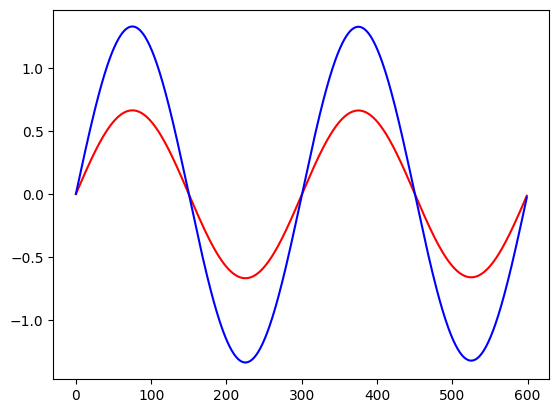

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def ds(curve, index):
    if index == len(curve) - 1:
        return np.linalg.norm(curve[0] - curve[-1])
    return np.linalg.norm(curve[index + 1] - curve[index])

def unit_normals(curve):
    out = np.zeros((len(curve), 2))
    for i in range(len(curve)-1):
        gradient = (curve[i + 1] - curve[i])
        gradient = gradient / np.linalg.norm(gradient)
        out[i] = np.array([-gradient[1], gradient[0]])
    gradient = (curve[0] - curve[-1])
    gradient = gradient / np.linalg.norm(gradient)
    out[-1] = np.array([-gradient[1], -gradient[0]])
    return out

#returns g11
def metric(curve, index, step_theta):
    if index == len(curve) - 1:
        return np.linalg.norm(curve[0] - curve[-1]) ** 2 / step_theta
    return np.linalg.norm(curve[index + 1] - curve[index]) ** 2 / step_theta

def metric_central(curve, index, step):
    if index == len(curve) - 1:
        return np.linalg.norm(curve[0] - curve[-2]) ** 2 / (2 * step_theta)
    if index == 0:
        return np.linalg.norm(curve[1] - curve[-1]) ** 2 / (2 * step)
    return np.linalg.norm(curve[index + 1] - curve[index - 1]) ** 2 / (2 * step_theta)

#for the curvature, we will use the length element ds
#instead of step in the parameter (likely dtheta, which defines the metric)
def curvature(curve, index):
    if index == len(curve) - 1:
        gradient1 = (curve[0] - curve[-1])
        gradient1 = gradient1 / np.linalg.norm(gradient1)
        gradient2 = (curve[-1] - curve[-2])
        gradient2 = gradient2 / np.linalg.norm(gradient2)
        return np.linalg.norm(gradient1 - gradient2) / ds(curve, index)    
    if index == 0:
        gradient1 = (curve[1] - curve[0])
        gradient1 = gradient1 / np.linalg.norm(gradient1)
        gradient2 = (curve[0] - curve[-1])
        gradient2 = gradient2 / np.linalg.norm(gradient2)

        return np.linalg.norm(gradient1 - gradient2) / ds(curve, index)

    gradient1 = (curve[index + 1] - curve[index])
    gradient1 = gradient1 / np.linalg.norm(gradient1)
    gradient2 = (curve[index] - curve[index - 1])
    gradient2 = gradient2 / np.linalg.norm(gradient2)

    return np.linalg.norm(gradient1 - gradient2) / ds(curve, index)
    
#note vdisps has shape (2 * number of points, 2)
# eg vdisps[0:2] = [vdisp_parallel at position 1, vdisp perp at position 1]
#for ease, the state vector will look like (sigma1, m1, sigma2, m2...)
def populate_matrix(curve, step_theta, vdisps):
    out = np.zeros((2 * len(curve), 2 * len(curve)))
    for i, vdisp in enumerate(vdisps):
        for j, point in enumerate(curve):
            
            dg = 0
            dkappa = 0

            flag = False
            #changes in metric and curvature at some position due to perturbation at
            #that same position, elif changes in metric and curvature at some position 
            #due to perturbation at neighboring position to the right elif same thing
            #to the left
            if i == 2 * j or i == 2 * j + 1:
                temp = curve.copy()
                temp[j] = point + vdisp
                dg = metric(temp, j, step_theta) - metric(curve, j, step_theta)
                dkappa = curvature(temp, j) - curvature(curve, j)
                print(dg)

            elif i == (2 * j + 2) % (2 * len(curve))  or i == (2 * j + 3) % (2 * len(curve)):
                temp = curve.copy()
                temp[(j + 1) % len(curve)] = temp[(j+1) % len(curve)] + vdisp
                dg = metric(temp, j, step_theta) - metric(curve, j, step_theta)
                dkappa = curvature(temp, j) - curvature(curve, j)
                print(dg)

            #here note python '%' is like mathematical mod. eg -1%5 = 4. Neat!
            elif i == (2 * j - 2)% (2 * len(curve)) or i == (2 * j - 1)% (2 * len(curve)):
                temp = curve.copy()
                #using central difference for this derivative as otherwise it would be 0
                temp[(j - 1)% len(curve)] = temp[(j - 1)% len(curve)] + vdisp
                dg = metric_central(temp, j, step_theta) - metric_central(curve, j, step_theta)
                dkappa = curvature(temp, j) - curvature(curve, j)
                print(dg)

            kappa = curvature(curve, j)

            #this is fine at first order
            entry1 = dg
            entry2 = -dg * kappa - dkappa

            out[i, 2 * j] = entry1 * step
            out[i, 2 * j + 1] = entry2 * step
    return out

#rhs of an equation such as Ax = b
#for now only works for forces in the perp direction
#as this also extracts the normal comp of x.
def populate_rhs(curve, forces_perp, vdisps):
    out = np.zeros(2 * len(forces_perp))
    forces_index = 0
    for i, vdisp in enumerate(vdisps):
        out[i] = np.dot(forces_perp[forces_index], vdisp) * ds(curve, forces_index)
        if i % 2 == 1:
            forces_index += 1
    return out

N_points = 600

R = 2

thetas = np.linspace(0, 2 * np.pi, N_points+1)[:N_points]
p = 1 * np.sin(2 * thetas) 
ps = np.array([p, p]).T

xs = 1 * R * np.cos(thetas)
ys = R * np.sin(thetas)

curve = np.array([xs, ys]).T

#Ok time to plate. Make sure forces are in perp direction, populate forces in the same way
step = 2 * np.pi * R / N_points
step_theta = 2 * np.pi / N_points

epsilon = step * 0.0000000001
# vdisps = np.random.rand(2 * len(curve), 2)
# vdisps = vdisps / np.linalg.norm(vdisps, axis=1)[:, np.newaxis]
vdisps = np.zeros((2 * len(curve), 2))
vdisps[0::2, 0] = 1  # Set every second element's y-component to 1
vdisps[1::2, 1] = 1  # Set every second element's x-component to 1
vdisps = vdisps * epsilon

forces_perp = ps * unit_normals(curve)

# forces_perp = curve * p / R
A = populate_matrix(curve, step_theta, vdisps)
b = populate_rhs(curve, forces_perp, vdisps)

#solve the system
x = np.linalg.solve(A, b)

sigmas = x[0::2]
ms = x[1::2]

plt.plot(sigmas[:], label='sigma', color='red')
plt.plot(ms[:], label='m', color='blue')

In [2]:
from helper_functions import *
import numpy as np
import matplotlib.pyplot as plt

N_points = 600

R = 2

thetas = np.linspace(0, 2 * np.pi, N_points+1)[:N_points]
p = 1 * np.sin(2 * thetas) 
ps = np.array([p, p]).T

xs = 1 * R * np.cos(thetas)
ys = R * np.sin(thetas)

curve = np.array([xs, ys]).T

#Ok time to plate. Make sure forces are in perp direction, populate forces in the same way
step = 2 * np.pi * R / N_points
step_theta = 2 * np.pi / N_points

epsilon = step * 0.0000000001
# vdisps = np.random.rand(2 * len(curve), 2)
# vdisps = vdisps / np.linalg.norm(vdisps, axis=1)[:, np.newaxis]
# vdisps = np.zeros((2 * len(curve), 2))
Ns = unit_normals(curve) * epsilon
vdisps = np.array([Ns, Ns])

# vdisps[0::2, 0] = 1  # Set every second element's y-component to 1
# vdisps[1::2, 1] = 1  # Set every second element's x-component to 1
# vdisps = vdisps * epsilon

forces_perp = ps * unit_normals(curve)

# forces_perp = curve * p / R
A = populate_matrix(curve, step_theta, vdisps)
b = populate_rhs(curve, forces_perp, vdisps)

#solve the system
x = np.linalg.solve(A, b)

sigmas = x[0::2]
ms = x[1::2]

plt.plot(sigmas[:], label='sigma', color='red')
plt.plot(ms[:], label='m', color='blue')

ValueError: could not broadcast input array from shape (600,2) into shape (2,)

In [9]:
curvec = curve.copy()
curvec[0,0] = curvec[0,0] + 0.00001
curvature(curvec, 0) - curvature(curve, 0)

np.float64(0.04559209696659616)

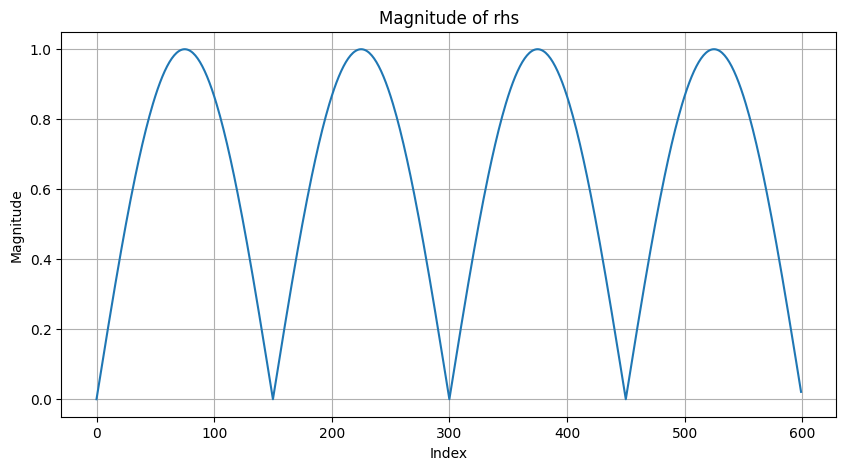

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(np.linalg.norm(forces_perp, axis=1))
plt.title('Magnitude of rhs')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

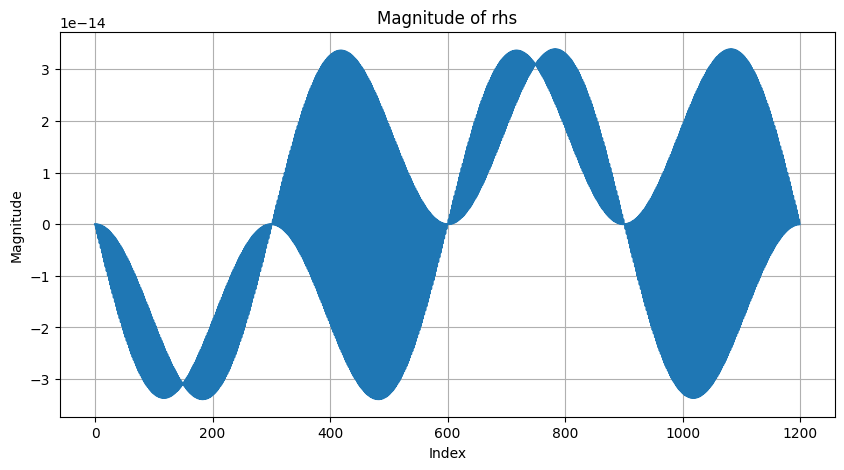

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(b)
plt.title('Magnitude of rhs')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

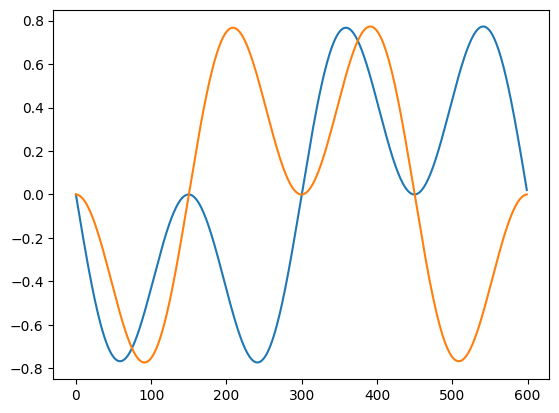

In [12]:
thetas = np.linspace(0, 2 * np.pi, N_points+1)[:N_points]
p = 10 ** (-3) * np.sin(thetas) 
np.array([p, p]).T

plt.plot(forces_perp)

In [13]:
ms[0] / sigmas[0]

np.float64(1.98034704893606)

In [14]:
print(p, R)

[ 0.00000000e+00  1.04717841e-05  2.09424199e-05  3.14107591e-05
  4.18756537e-05  5.23359562e-05  6.27905195e-05  7.32381971e-05
  8.36778433e-05  9.41083133e-05  1.04528463e-04  1.14937150e-04
  1.25333234e-04  1.35715572e-04  1.46083029e-04  1.56434465e-04
  1.66768747e-04  1.77084740e-04  1.87381315e-04  1.97657340e-04
  2.07911691e-04  2.18143241e-04  2.28350870e-04  2.38533458e-04
  2.48689887e-04  2.58819045e-04  2.68919821e-04  2.78991106e-04
  2.89031797e-04  2.99040792e-04  3.09016994e-04  3.18959309e-04
  3.28866647e-04  3.38737920e-04  3.48572047e-04  3.58367950e-04
  3.68124553e-04  3.77840787e-04  3.87515586e-04  3.97147891e-04
  4.06736643e-04  4.16280792e-04  4.25779292e-04  4.35231099e-04
  4.44635179e-04  4.53990500e-04  4.63296035e-04  4.72550765e-04
  4.81753674e-04  4.90903754e-04  5.00000000e-04  5.09041416e-04
  5.18027009e-04  5.26955795e-04  5.35826795e-04  5.44639035e-04
  5.53391549e-04  5.62083378e-04  5.70713568e-04  5.79281172e-04
  5.87785252e-04  5.96224

In [15]:
import numpy as np

# Generate two random vectors of dimension 1000
vector1 = np.random.rand(1000)
vector2 = np.random.rand(1000)

# Normalize the vectors to have norm 1
vector1 /= np.linalg.norm(vector1)
vector2 /= np.linalg.norm(vector2)

# Generate two random vectors of dimension 1000
vector3 = np.random.rand(2)
vector4 = np.random.rand(2)

# Normalize the vectors to have norm 1
vector3 /= np.linalg.norm(vector3)
vector4 /= np.linalg.norm(vector4)

np.dot(vector1, vector2) / np.dot(vector3, vector4)

np.float64(0.8447944500091693)

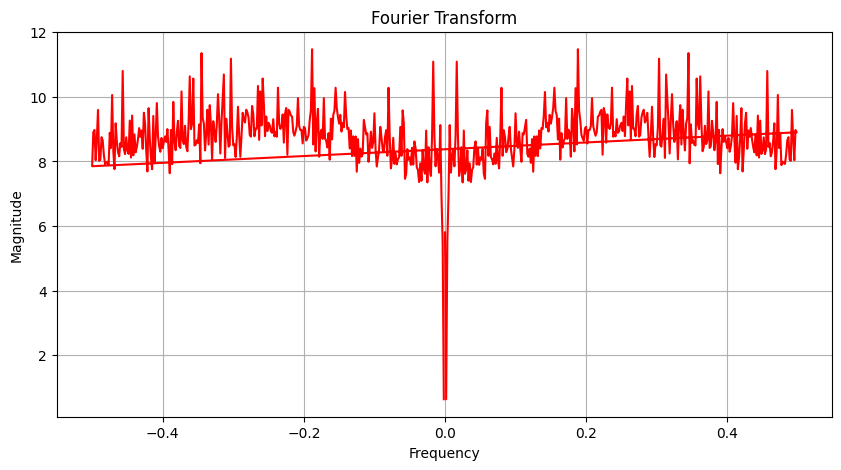

In [16]:
# Perform Fourier transform
sigmas_ft = np.log(np.fft.fft(sigmas))
ms_ft = np.log(np.fft.fft(ms))

# Get the frequencies corresponding to the Fourier transform
frequencies = np.fft.fftfreq(len(sigmas))

# Plot the magnitude of the Fourier transform
plt.figure(figsize=(10, 5))
plt.plot(frequencies, np.abs(sigmas_ft), color='red')
# plt.plot(frequencies, np.abs(ms_ft), color='blue')
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

In [17]:
# Check for rows that are all zeros
zero_rows = np.where(~A.any(axis=1))[0]

# Check for columns that are all zeros
zero_columns = np.where(~A.any(axis=0))[0]

print("Zero rows indices:", zero_rows)
print("Zero columns indices:", zero_columns)

Zero rows indices: []
Zero columns indices: []


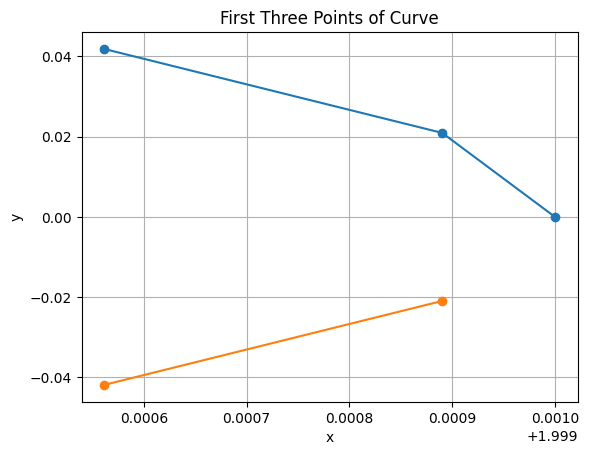

TypeError: curvature() takes 2 positional arguments but 3 were given

In [18]:
plt.plot(curve[:3, 0], curve[:3, 1], marker='o')

plt.plot(curve[-2:, 0], curve[-2:, 1], marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('First Three Points of Curve')
plt.grid(True)
plt.show()

curvature(curve, 0, 0.01 * 2 * np.pi)

In [ ]:
count = 0

for i in range(200):
    foo = np.count_nonzero(A[i, :])

    if foo != 6:
        print(np.count_nonzero(A[i, :]), i)
        count += np.count_nonzero(A[i, :])

count

0

In [ ]:
eigenvalues = np.linalg.eigvals(A)
nonzero_eigenvalues_count = np.count_nonzero(eigenvalues)
print(nonzero_eigenvalues_count)

2400


In [ ]:
vdisps = np.random.rand(2 * len(curve), 2)
vdisps.shape

(2000, 2)

In [ ]:
thetas = np.linspace(0, 2 * np.pi, 101)[:101]
thetas

array([0.        , 0.06283185, 0.12566371, 0.18849556, 0.25132741,
       0.31415927, 0.37699112, 0.43982297, 0.50265482, 0.56548668,
       0.62831853, 0.69115038, 0.75398224, 0.81681409, 0.87964594,
       0.9424778 , 1.00530965, 1.0681415 , 1.13097336, 1.19380521,
       1.25663706, 1.31946891, 1.38230077, 1.44513262, 1.50796447,
       1.57079633, 1.63362818, 1.69646003, 1.75929189, 1.82212374,
       1.88495559, 1.94778745, 2.0106193 , 2.07345115, 2.136283  ,
       2.19911486, 2.26194671, 2.32477856, 2.38761042, 2.45044227,
       2.51327412, 2.57610598, 2.63893783, 2.70176968, 2.76460154,
       2.82743339, 2.89026524, 2.95309709, 3.01592895, 3.0787608 ,
       3.14159265, 3.20442451, 3.26725636, 3.33008821, 3.39292007,
       3.45575192, 3.51858377, 3.58141563, 3.64424748, 3.70707933,
       3.76991118, 3.83274304, 3.89557489, 3.95840674, 4.0212386 ,
       4.08407045, 4.1469023 , 4.20973416, 4.27256601, 4.33539786,
       4.39822972, 4.46106157, 4.52389342, 4.58672527, 4.64955